### This project is the part of British Airways Online Internship May 2023

Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.



### Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customer_booking.csv', encoding='latin')
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
data2 = data

First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

There are no missing values. There are 5 object type data, that may be transformed into numerical values.

In [5]:
data['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

It can be observed that one class has ~6 times more data, which results in imbalance training. Below it can be observed how this affects the model results. The one way of resolving this issue is undersampling the imbalanced class data.

### Unique values

In [6]:
print("Number of unique values for each column")
for i in data.columns:
    print(i, '->', len(data[i].unique()))

Number of unique values for each column
num_passengers -> 9
sales_channel -> 2
trip_type -> 3
purchase_lead -> 470
length_of_stay -> 335
flight_hour -> 24
flight_day -> 7
route -> 799
booking_origin -> 104
wants_extra_baggage -> 2
wants_preferred_seat -> 2
wants_in_flight_meals -> 2
flight_duration -> 21
booking_complete -> 2


### Transforming object data type to numerical

In [7]:
columns = ['sales_channel', 'trip_type', 'flight_day']

def to_numerical(data, column):
    types = {}
    for i,j in enumerate(data[column].unique()):
        print(i, j)
        types[j] = i
    data[column] = data[column].map(types)
    return data[column]

for i in columns:
    data[i+'_numerical'] = to_numerical(data, i)

0 Internet
1 Mobile
0 RoundTrip
1 CircleTrip
2 OneWay
0 Sat
1 Wed
2 Thu
3 Mon
4 Sun
5 Tue
6 Fri


### Data Without One-hot en.

<AxesSubplot:>

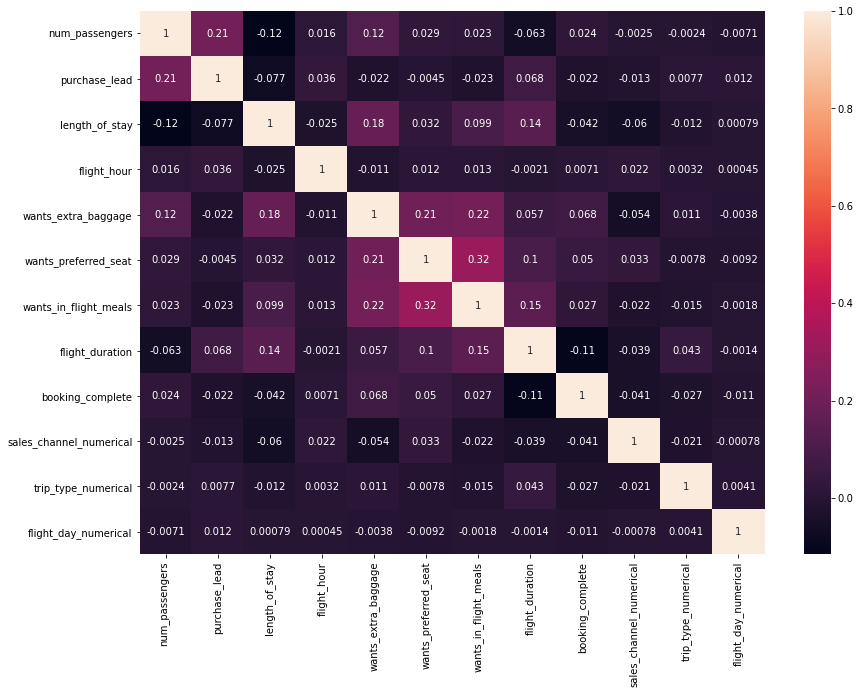

In [8]:
# getting feature and output columns
df = data.drop(['booking_origin', 'route'] + columns, axis=1)

q = data.drop(['booking_origin', 'route'] + columns, axis=1)

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

In [9]:
booking_complete = df.groupby("booking_complete").mean()
booking_complete.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_numerical,trip_type_numerical,flight_day_numerical
booking_complete,,,,,,,,,,,
0,1.580923,85.779926,23.647218,9.050162,0.655331,0.287357,0.421641,7.344266,0.117798,0.019872,3.048210
1,1.649906,80.167157,19.617679,9.158331,0.745253,0.351565,0.458411,6.898258,0.081439,0.006018,2.989971


<AxesSubplot:xlabel='booking_complete'>

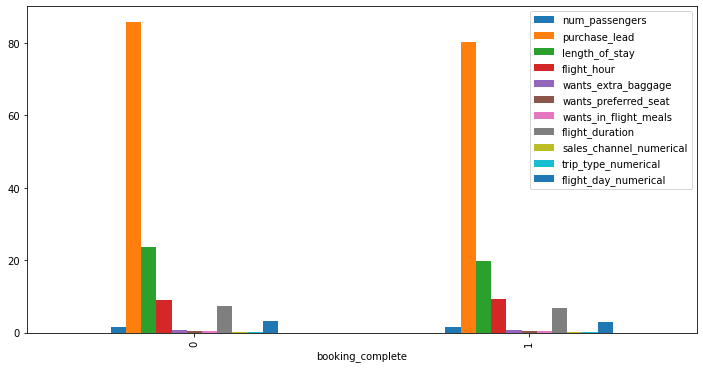

In [10]:
booking_complete.plot.bar(figsize=(12,6))

in this bar plot it can be observed that both categories have similar data. The difference is not very great.

### Model Data Preparation

When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

### Random Forest Classifier

Random Forest Classifier, Naive Bayes Classifier and Support Vector Machines are the basic algorithms/models when working with categorical data. In this analysis, only Random Forest and Naive Bayes algorithms were used.

In [11]:
# Splitting the data and creating a model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = data2.drop(['booking_complete', 'route', 'booking_origin'] + columns, axis=1)
y = data2['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=100)

forest = RandomForestClassifier(n_estimators=100, random_state=100)

In [12]:
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

In [13]:
# Random Forest Classification
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12757
           1       0.44      0.06      0.11      2243

    accuracy                           0.85     15000
   macro avg       0.65      0.52      0.51     15000
weighted avg       0.79      0.85      0.80     15000



### Cross Validation + original data

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest, q_data, q_target, cv=5)

In [54]:
scores.mean()

0.64652

### Multinomial Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
r = nb.fit(X_train, y_train)

In [15]:
y_predicted = nb.predict(X_test)
# Naive Bayes Results
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83     12757
           1       0.19      0.28      0.23      2243

    accuracy                           0.71     15000
   macro avg       0.53      0.53      0.53     15000
weighted avg       0.76      0.71      0.74     15000



In [16]:
y_train_predicted = forest.predict(X_train)
print(metrics.classification_report(y_train_predicted, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29774
           1       1.00      1.00      1.00      5226

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000



Naive Bayes algorithm performs poor on this dataset, so mainly Random Forest Algorithm will be used.

## Undersampling

Process of removing data of the imbalanced class until classes are balanced or have equal amount of data.

In [17]:
from sklearn.utils import resample

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
df = pd.concat([X_train, y_train], axis=1)

df_majority = df[df.booking_complete==0]
df_minority = df[df.booking_complete==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),  # to match minority class
                                 random_state=1234) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.booking_complete.value_counts()

0    5610
1    5610
Name: booking_complete, dtype: int64

### Random Forest + Undersampling

In [18]:
### Splitting the data and creating a model
X_1 = df_downsampled.drop(['booking_complete'], axis=1)
y_1 = df_downsampled['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, stratify=y_1, test_size=0.3, random_state=100)

forest = RandomForestClassifier(n_estimators=100, random_state=100)

In [19]:
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

In [20]:
# Random Forest Classification
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1683
           1       0.63      0.62      0.62      1683

    accuracy                           0.62      3366
   macro avg       0.62      0.62      0.62      3366
weighted avg       0.62      0.62      0.62      3366



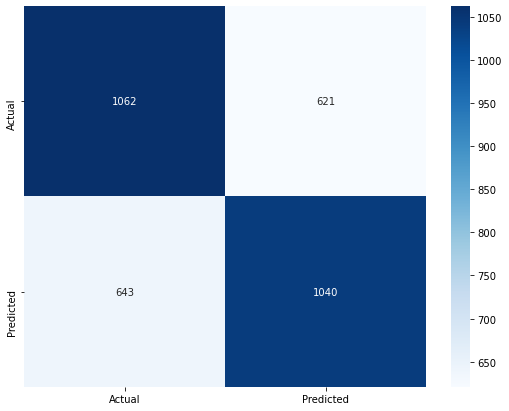

In [21]:
# confusion matrix
plt.figure(figsize=(9, 7))
sns.heatmap(metrics.confusion_matrix(y_test, predictions), annot=True,fmt='.4g', 
            xticklabels=['Actual','Predicted'], yticklabels=['Actual','Predicted'], cmap='Blues')
plt.show()

Undersampling didn't resolve the issue. Model underfits

## Undersampling + Oversampling

In comparison to Undersampling, Oversampling or Upsampling is the process of synthetic data size increase. Oversampling itself leads to overfitting, since no additional noise is produced. For this section, at first undersampling of the minor class data size then minor class data oversampling were provided.

In [22]:
# Undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
df = pd.concat([X_train, y_train], axis=1)

df_majority = df[df.booking_complete==0]
df_minority = df[df.booking_complete==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority)*3,  # to match minority class
                                 random_state=1234) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.booking_complete.value_counts()

0    16830
1     5610
Name: booking_complete, dtype: int64

In [23]:
# Oversample minority class
df_maj = df_downsampled[df_downsampled['booking_complete'] == 0]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_maj),    # to match majority class
                                 random_state=1234) # reproducible results

# Combine minority class with downsampled majority class
df_sampled = pd.concat([df_minority_upsampled, df_maj])
 
# Display new class counts
df_sampled.booking_complete.value_counts()

1    16830
0    16830
Name: booking_complete, dtype: int64

### Random Forest + Undersampling + Oversampling

In [24]:
### Splitting the data and creating a model

X_2 = df_sampled.drop(['booking_complete'], axis=1)
y_2 = df_sampled['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, stratify=y_2, test_size=0.3, random_state=100)

forest = RandomForestClassifier(n_estimators=100, random_state=100)

In [25]:
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

In [26]:
# Random Forest Classification
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      5049
           1       0.85      0.91      0.88      5049

    accuracy                           0.88     10098
   macro avg       0.88      0.88      0.88     10098
weighted avg       0.88      0.88      0.88     10098



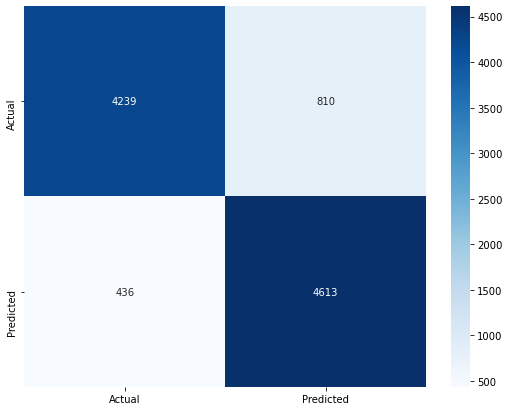

In [27]:
# confusion matrix
plt.figure(figsize=(9, 7))
sns.heatmap(metrics.confusion_matrix(y_test, predictions), annot=True,fmt='.4g', 
            xticklabels=['Actual','Predicted'], yticklabels=['Actual','Predicted'], cmap='Blues')
plt.show()

### Cross Validation + Random Forest + Undersampling + Oversampling

In [57]:
scores = cross_val_score(forest, X_2, y_2, cv=5)
scores.mean()

0.8960190136660724

In [28]:
# training data
train_predictions = forest.predict(X_train)
print(metrics.classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11781
           1       1.00      1.00      1.00     11781

    accuracy                           1.00     23562
   macro avg       1.00      1.00      1.00     23562
weighted avg       1.00      1.00      1.00     23562



This model seems to perform well, but it is clearly overfitting.

### Multinomial Naive Bayes + Undersampling + Oversampling

In [29]:
nb = MultinomialNB()
r = nb.fit(X_train, y_train)

In [30]:
y_predicted = nb.predict(X_test)
# Naive Bayes Results
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.58      0.39      0.47      5049
           1       0.54      0.72      0.62      5049

    accuracy                           0.55     10098
   macro avg       0.56      0.55      0.54     10098
weighted avg       0.56      0.55      0.54     10098



## SMOTE

SMOTE - Synthetic Minority Oversampling TEchnique. This method is similar to Oversampling, but creates additional noise, hence better than basic oversampling

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
oversample = SMOTE()
X_3, y_3 = oversample.fit_resample(X, y)

In [33]:
X_3.shape

(85044, 11)

In [34]:
y_3.shape

(85044,)

In [35]:
df3 = pd.concat([X_3,y_3], axis=1)
df3.booking_complete.value_counts()

0    42522
1    42522
Name: booking_complete, dtype: int64

### Random Forest + SMOTE Oversampling

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, stratify=y_3, test_size=0.3, random_state=100)

forest = RandomForestClassifier(n_estimators=100, random_state=100)

In [37]:
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

In [38]:
# Random Forest Classification
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     12757
           1       0.87      0.85      0.86     12757

    accuracy                           0.86     25514
   macro avg       0.86      0.86      0.86     25514
weighted avg       0.86      0.86      0.86     25514



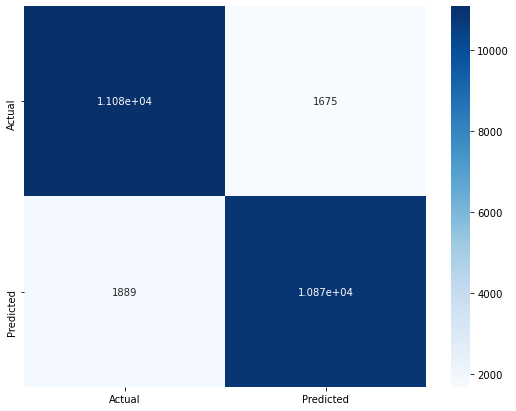

In [39]:
# confusion matrix
plt.figure(figsize=(9, 7))
sns.heatmap(metrics.confusion_matrix(y_test, predictions), annot=True,fmt='.4g', 
            xticklabels=['Actual','Predicted'], yticklabels=['Actual','Predicted'], cmap='Blues')
plt.show()

### Cross Validation + Random Forest + SMOTE Oversampling

In [55]:
scores = cross_val_score(forest, X_3, y_3, cv=5)
scores.mean()

0.6906526403458476

In [40]:
# training data
train_predictions = forest.predict(X_train)
print(metrics.classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29765
           1       1.00      1.00      1.00     29765

    accuracy                           1.00     59530
   macro avg       1.00      1.00      1.00     59530
weighted avg       1.00      1.00      1.00     59530



##  Undersampling + SMOTE Oversampling

In [62]:
over = SMOTE(sampling_strategy=1)

In [60]:
X_4 = df_downsampled.drop(['booking_complete'], axis=1)
y_4 = df_downsampled['booking_complete']

In [70]:
X_res, y_res = over.fit_resample(X_4, y_4)

### Random Forest + Undersampling + SMOTE Oversampling

In [64]:
forest = RandomForestClassifier(n_estimators=100, random_state=100)

forest.fit(X_res,y_res)
predictions = forest.predict(X_test)

In [65]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     12757
           1       0.89      0.88      0.88     12757

    accuracy                           0.88     25514
   macro avg       0.88      0.88      0.88     25514
weighted avg       0.88      0.88      0.88     25514



In [66]:
df_3 = pd.concat([X_res, y_res], axis=1)
df_3.booking_complete.value_counts()

0    16830
1    16830
Name: booking_complete, dtype: int64

### Cross Validation + Random Forest + Undersampling + SMOTE Oversampling

In [71]:
scores = cross_val_score(forest, X_res, y_res, cv=5)
scores.mean()

0.7869578134284017

In [67]:
predictions = forest.predict(X_res)
print(metrics.classification_report(y_res, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16830
           1       1.00      1.00      1.00     16830

    accuracy                           1.00     33660
   macro avg       1.00      1.00      1.00     33660
weighted avg       1.00      1.00      1.00     33660



## Standardization

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

q_data = q.drop(['booking_complete'], axis=1).values
q_target = q.booking_complete
 
Q_train, Q_test, q_train, q_test = train_test_split(q_data, q_target, test_size=0.3, random_state=100)
    
# standardization 
scale_train = scaler.fit_transform(Q_train) 
scale_test = scaler.fit_transform(Q_test)

print(scale_train.shape)
print(scale_test.shape)

(35000, 11)
(15000, 11)


In [51]:
forest = RandomForestClassifier(random_state=100)

forest.fit(scale_train, q_train)
predictions = forest.predict(scale_test)

In [52]:
print(metrics.classification_report(q_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12787
           1       0.41      0.06      0.10      2213

    accuracy                           0.85     15000
   macro avg       0.63      0.52      0.51     15000
weighted avg       0.79      0.85      0.80     15000



doesn't seem to affect the model performance

From the experiment provided in this Customer Behavior Prediction Analsysis, Undersampling and Oversampling provided the best results.

### Results Table

In [78]:
d = {}
d['Original'] = data2.booking_complete.value_counts().to_list() + [cross_val_score(forest, q_data, q_target, cv=5).mean()]

d['Under'] = df_downsampled.booking_complete.value_counts().to_list() + [cross_val_score(forest, X_1, y_1, cv=5).mean()]

d['Under+Over'] = df_sampled.booking_complete.value_counts().to_list() + [cross_val_score(forest, X_2, y_2, cv=5).mean()]

temp = pd.concat([X_3,y_3], axis=1).booking_complete.value_counts().to_list()
d['SMOTE_Over'] = temp + [cross_val_score(forest, X_3, y_3, cv=5).mean()]

d['Under+SMOTE_Over'] = df_3.booking_complete.value_counts().to_list() + [cross_val_score(forest, X_res, y_res, cv=5).mean()]

In [86]:
pd.DataFrame.from_dict(d, orient = 'index', columns=['0', '1', 'val_score'])

,0,1,val_score
Original,42522,7478,0.646520
Under,16830,5610,0.618093
Under+Over,16830,16830,0.896019
SMOTE_Over,42522,42522,0.690653
Under+SMOTE_Over,16830,16830,0.786958
